# Spotify Analysis: Data Cleaning and EDA

This notebook performs data cleaning and exploratory data analysis on the Spotify dataset to compare pop genres and popularity.


## Project Overview
We chose the Spotify Tracks Dataset to analyze the factors that affect the popularity of a song. From the column descriptions: 

"popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity."

Thus, we want to analyze the factors that determine this popularity, such as artist, danceability, energy, key, loudness, mode, tempo, etc. Then, we will test our model to see if it can ascertain the correct probability in the validation and testing datasets, and see if our model matches the provided algorithm. We will specifically be analyzing songs in the "pop" genre, combining pop, mando-pop, k-pop, etc.

## Import Required Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [80]:
print("Columns in dataset:")
print(df.columns.tolist())
print(df.dtypes)

Columns in dataset:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [81]:
genre_counts = df['track_genre'].value_counts()
print(f"Most popular genre: {genre_counts.index[0]}")
print(f"Number of tracks: {genre_counts.iloc[0]}")
print("\nTop 10 genres by number of tracks:")
print(genre_counts.head(10))

Most popular genre: acoustic
Number of tracks: 1000

Top 10 genres by number of tracks:
track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
Name: count, dtype: int64


In [82]:
num_genres = df['track_genre'].nunique()
print(f"Total number of unique genres: {num_genres}")

Total number of unique genres: 114


In [83]:
all_genres = sorted(df['track_genre'].unique())
print("All 114 genres:")
for i, genre in enumerate(all_genres, 1):
    print(f"{i}. {genre}")

All 114 genres:
1. acoustic
2. afrobeat
3. alt-rock
4. alternative
5. ambient
6. anime
7. black-metal
8. bluegrass
9. blues
10. brazil
11. breakbeat
12. british
13. cantopop
14. chicago-house
15. children
16. chill
17. classical
18. club
19. comedy
20. country
21. dance
22. dancehall
23. death-metal
24. deep-house
25. detroit-techno
26. disco
27. disney
28. drum-and-bass
29. dub
30. dubstep
31. edm
32. electro
33. electronic
34. emo
35. folk
36. forro
37. french
38. funk
39. garage
40. german
41. gospel
42. goth
43. grindcore
44. groove
45. grunge
46. guitar
47. happy
48. hard-rock
49. hardcore
50. hardstyle
51. heavy-metal
52. hip-hop
53. honky-tonk
54. house
55. idm
56. indian
57. indie
58. indie-pop
59. industrial
60. iranian
61. j-dance
62. j-idol
63. j-pop
64. j-rock
65. jazz
66. k-pop
67. kids
68. latin
69. latino
70. malay
71. mandopop
72. metal
73. metalcore
74. minimal-techno
75. mpb
76. new-age
77. opera
78. pagode
79. party
80. piano
81. pop
82. pop-film
83. power-pop
84. pr

In [84]:
pop_genres = [genre for genre in all_genres if 'pop' in genre.lower()]
print(f"Number of genres containing 'pop': {len(pop_genres)}")
print("\nGenres with 'pop' in the name:")
for genre in pop_genres:
    print(f"  - {genre}")

Number of genres containing 'pop': 9

Genres with 'pop' in the name:
  - cantopop
  - indie-pop
  - j-pop
  - k-pop
  - mandopop
  - pop
  - pop-film
  - power-pop
  - synth-pop


In [85]:
pop_df = df[df['track_genre'].isin(pop_genres)]
print(f"Total tracks in pop genres: {len(pop_df)}")
print(f"Shape of pop dataset: {pop_df.shape}")

pop_df.to_csv('pop_genres_dataset.csv', index=False)
print("\nSaved pop genres dataset to 'pop_genres_dataset.csv'")

Total tracks in pop genres: 9000
Shape of pop dataset: (9000, 21)

Saved pop genres dataset to 'pop_genres_dataset.csv'


In [86]:
pop_df_cleaned = pop_df.drop(columns=['track_id', 'album_name', 'Unnamed: 0'])
pop_df_cleaned['explicit'] = pop_df_cleaned['explicit'].astype(int)
pop_df_cleaned.to_csv('pop_genres_dataset.csv', index=False)
print(f"Cleaned dataset: {pop_df_cleaned.shape}")
print(f"Columns: {pop_df_cleaned.columns.tolist()}")

Cleaned dataset: (9000, 18)
Columns: ['artists', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


## Data Quality: Missing Values

In [87]:
print("Popularity IQR for each pop genre:")
print("="*60)

pop_iqr_data = []
for genre in sorted(pop_genres):
    genre_data = pop_df[pop_df['track_genre'] == genre]['popularity']
    q1 = genre_data.quantile(0.25)
    q3 = genre_data.quantile(0.75)
    iqr = q3 - q1
    median = genre_data.median()
    mean = genre_data.mean()
    
    pop_iqr_data.append({
        'genre': genre,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'median': median,
        'mean': mean
    })
    
    print(f"\n{genre}:")
    print(f"  Q1 (25th percentile): {q1:.2f}")
    print(f"  Q3 (75th percentile): {q3:.2f}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Mean: {mean:.2f}")

iqr_summary_df = pd.DataFrame(pop_iqr_data)
print("\n" + "="*60)
print("\nSummary Table:")
print(iqr_summary_df.to_string(index=False))

Popularity IQR for each pop genre:

cantopop:
  Q1 (25th percentile): 22.00
  Q3 (75th percentile): 47.00
  IQR: 25.00
  Median: 35.00
  Mean: 34.74

indie-pop:
  Q1 (25th percentile): 0.00
  Q3 (75th percentile): 66.00
  IQR: 66.00
  Median: 47.00
  Mean: 40.66

j-pop:
  Q1 (25th percentile): 36.00
  Q3 (75th percentile): 58.00
  IQR: 22.00
  Median: 41.00
  Mean: 41.14

k-pop:
  Q1 (25th percentile): 48.00
  Q3 (75th percentile): 69.00
  IQR: 21.00
  Median: 60.00
  Mean: 56.90

mandopop:
  Q1 (25th percentile): 40.00
  Q3 (75th percentile): 54.00
  IQR: 14.00
  Median: 49.00
  Mean: 45.02

pop:
  Q1 (25th percentile): 2.00
  Q3 (75th percentile): 71.00
  IQR: 69.00
  Median: 66.00
  Mean: 47.58

pop-film:
  Q1 (25th percentile): 57.00
  Q3 (75th percentile): 64.00
  IQR: 7.00
  Median: 60.00
  Mean: 59.28

power-pop:
  Q1 (25th percentile): 21.00
  Q3 (75th percentile): 27.00
  IQR: 6.00
  Median: 23.00
  Mean: 26.90

synth-pop:
  Q1 (25th percentile): 24.00
  Q3 (75th percentile): 

## Exploratory Data Analysis: 5 Key Features

We will analyze the following 5 key audio features across all pop genres:
1. **Energy**: Perceptual measure of intensity and activity (0.0 to 1.0)
2. **Acousticness**: Confidence measure of whether the track is acoustic (0.0 to 1.0)
3. **Valence**: Musical positiveness conveyed by a track (0.0 to 1.0)
4. **Loudness**: Overall loudness of a track in decibels (-60 to 0)
5. **Danceability**: How suitable a track is for dancing (0.0 to 1.0)

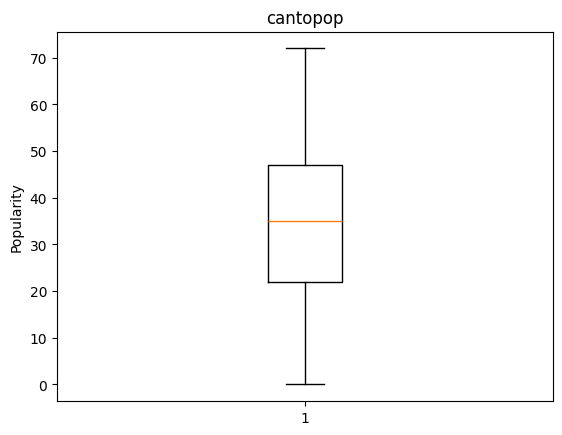

In [88]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'cantopop']['popularity'])
plt.title('cantopop')
plt.ylabel('Popularity')
plt.show()

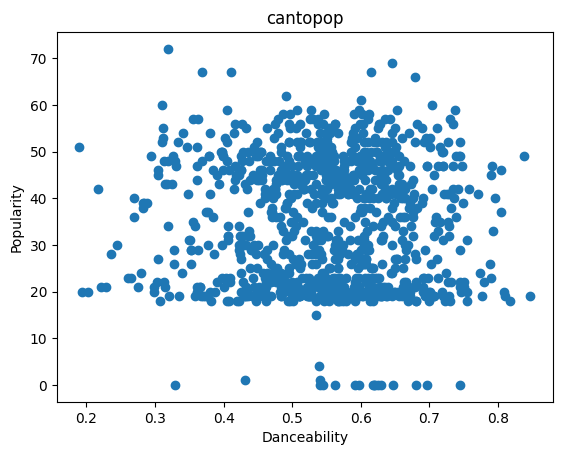

In [89]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'cantopop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('cantopop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

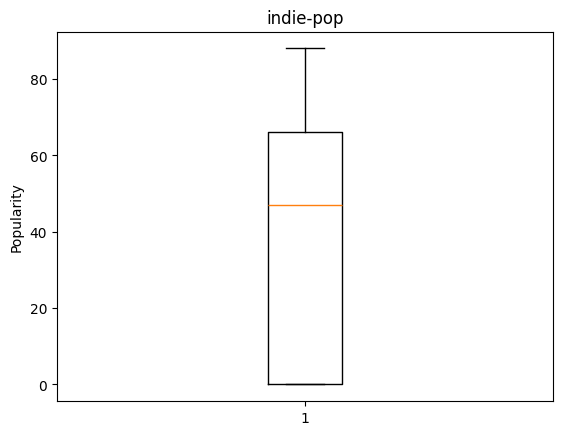

In [90]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'indie-pop']['popularity'])
plt.title('indie-pop')
plt.ylabel('Popularity')
plt.show()

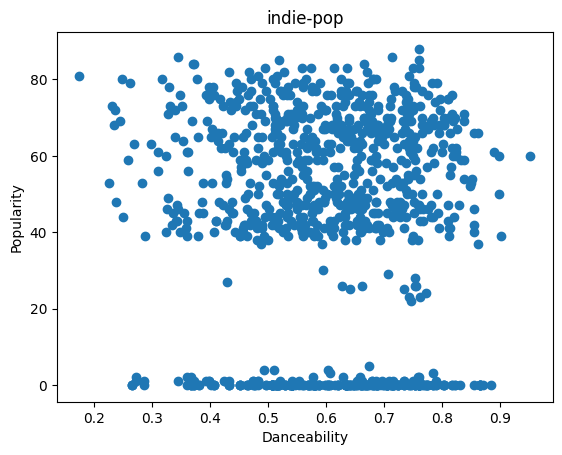

In [91]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'indie-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('indie-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

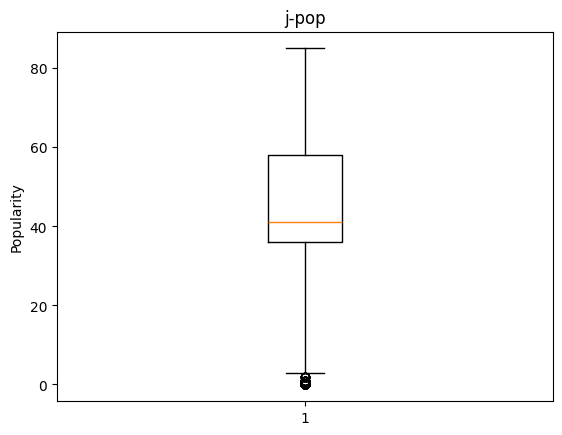

In [92]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'j-pop']['popularity'])
plt.title('j-pop')
plt.ylabel('Popularity')
plt.show()

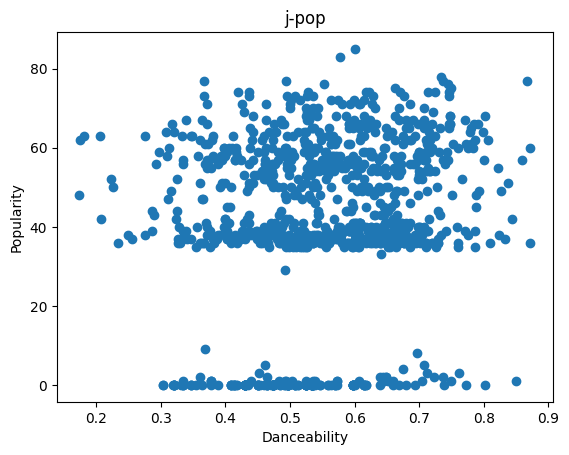

In [93]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'j-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('j-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

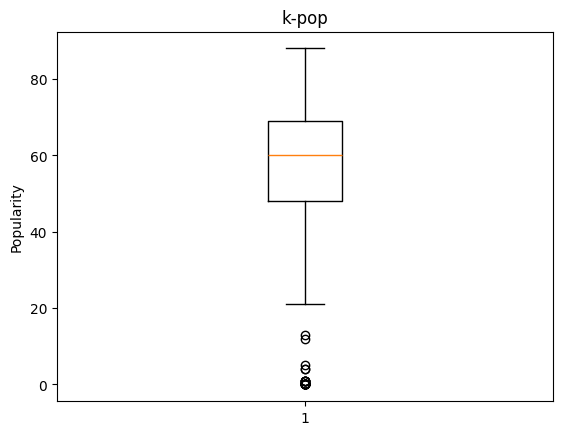

In [94]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'k-pop']['popularity'])
plt.title('k-pop')
plt.ylabel('Popularity')
plt.show()

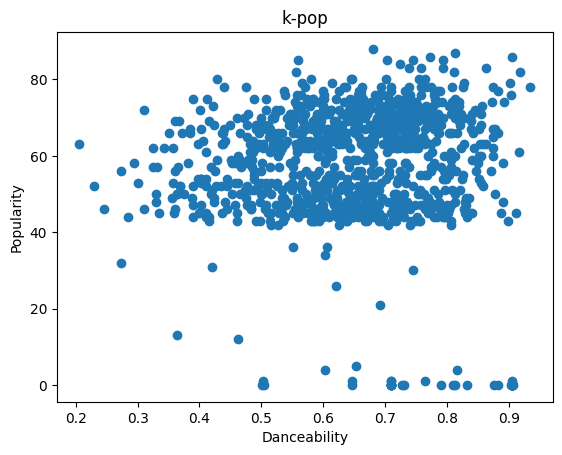

In [95]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'k-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('k-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

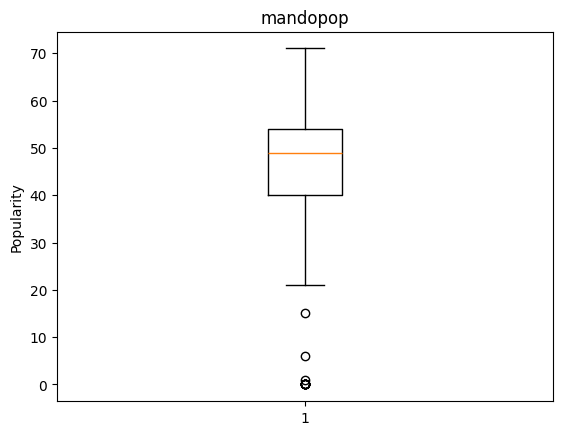

In [96]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'mandopop']['popularity'])
plt.title('mandopop')
plt.ylabel('Popularity')
plt.show()

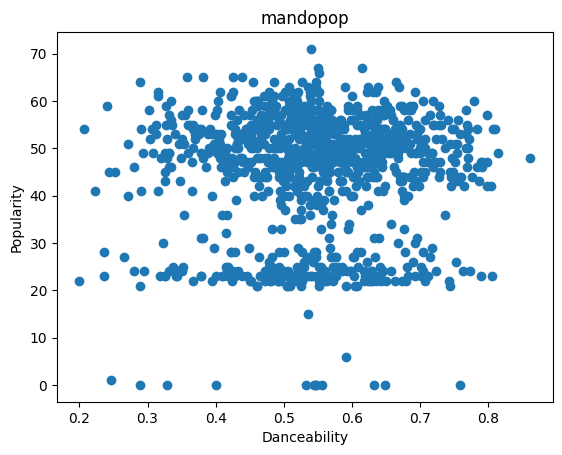

In [97]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'mandopop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('mandopop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

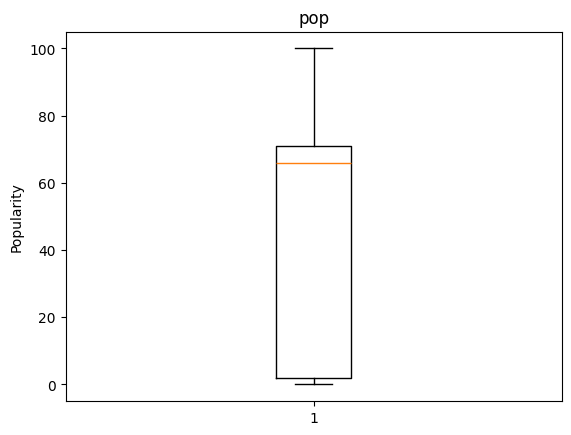

In [98]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop']['popularity'])
plt.title('pop')
plt.ylabel('Popularity')
plt.show()

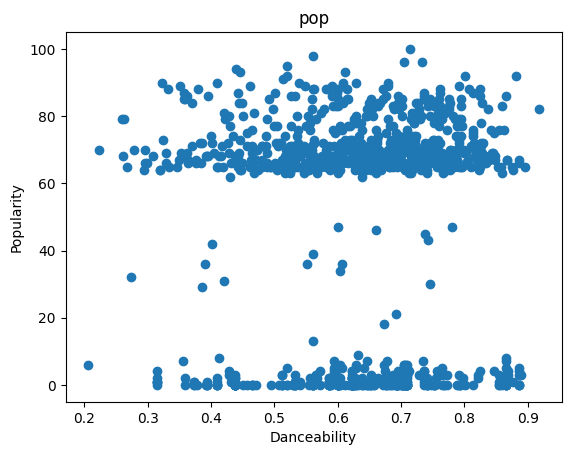

In [99]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

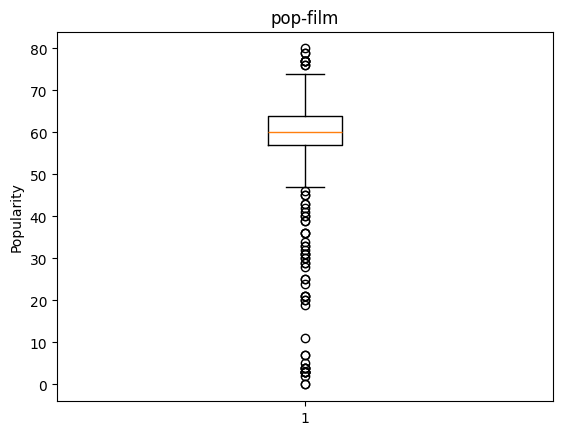

In [100]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop-film']['popularity'])
plt.title('pop-film')
plt.ylabel('Popularity')
plt.show()

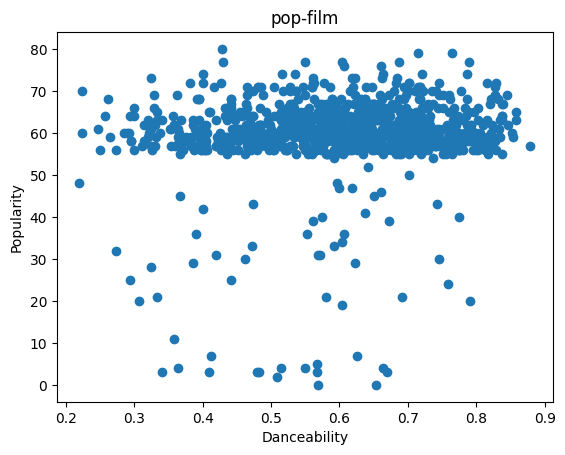

In [101]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop-film']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('pop-film')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

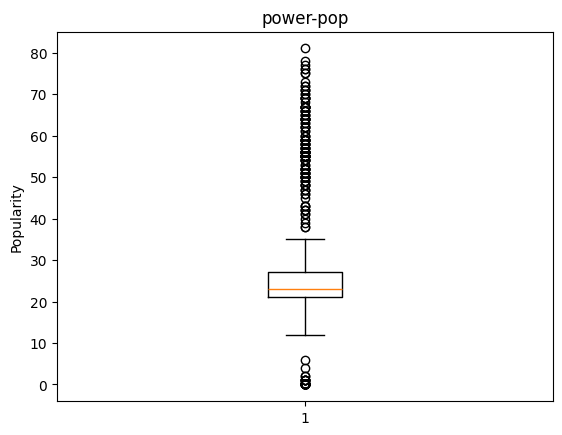

In [102]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'power-pop']['popularity'])
plt.title('power-pop')
plt.ylabel('Popularity')
plt.show()

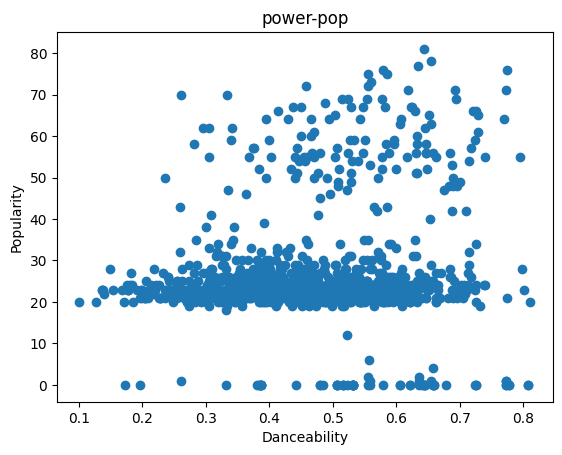

In [103]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'power-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('power-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

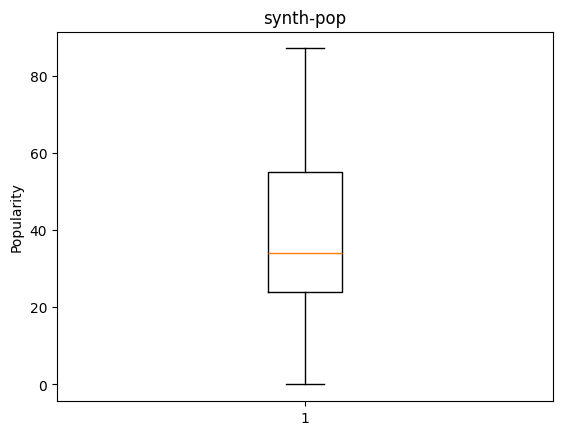

In [104]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'synth-pop']['popularity'])
plt.title('synth-pop')
plt.ylabel('Popularity')
plt.show()

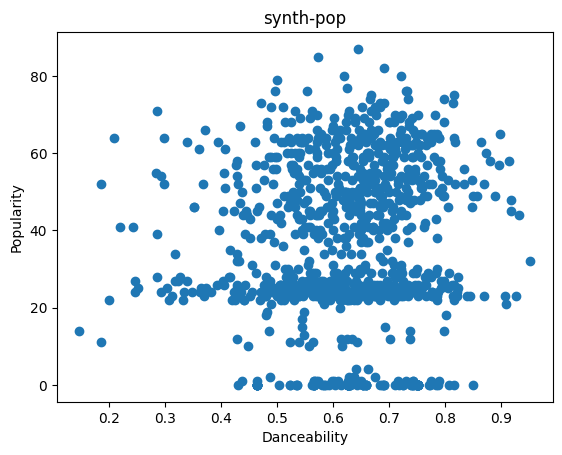

In [105]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'synth-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('synth-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

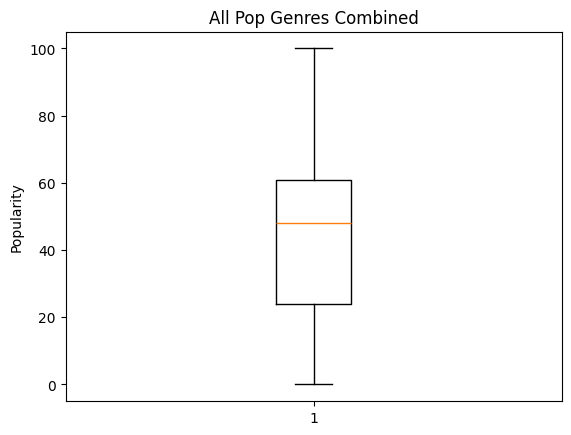

In [106]:
plt.boxplot(pop_df_cleaned['popularity'])
plt.title('All Pop Genres Combined')
plt.ylabel('Popularity')
plt.show()

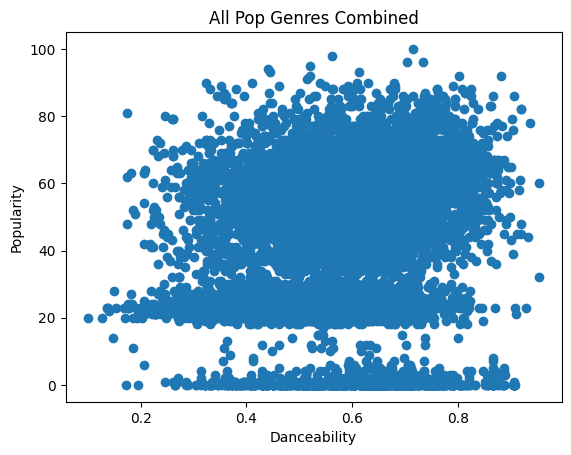

In [107]:
plt.scatter(pop_df_cleaned['danceability'], pop_df_cleaned['popularity'])
plt.title('All Pop Genres Combined')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

## Train/Validation/Test Split

Split the cleaned pop dataset into training (60%), validation (20%), and test (20%) sets.

In [108]:
from sklearn.model_selection import train_test_split

# First split: 60% train, 40% temp (which will be split into val and test)
X = pop_df_cleaned.drop(columns=['track_genre'])
y = pop_df_cleaned['track_genre']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,      # 40% for validation + test
    random_state=42,
    stratify=y          # maintain genre proportions
)

# Second split: split the 40% temp into 50/50 (20% val, 20% test of original)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,      # 50% of 40% = 20% of original
    random_state=42,
    stratify=y_temp
)

print("Dataset split sizes:")
print(f"Training set:   {len(X_train):5d} samples ({len(X_train)/len(pop_df_cleaned)*100:.1f}%)")
print(f"Validation set: {len(X_val):5d} samples ({len(X_val)/len(pop_df_cleaned)*100:.1f}%)")
print(f"Test set:       {len(X_test):5d} samples ({len(X_test)/len(pop_df_cleaned)*100:.1f}%)")
print(f"Total:          {len(pop_df_cleaned):5d} samples")

Dataset split sizes:
Training set:    5400 samples (60.0%)
Validation set:  1800 samples (20.0%)
Test set:        1800 samples (20.0%)
Total:           9000 samples


In [109]:
# Verify genre distribution is maintained across splits
print("\nGenre distribution in each set:")
print("\nTraining set:")
print(y_train.value_counts().sort_index())
print("\nValidation set:")
print(y_val.value_counts().sort_index())
print("\nTest set:")
print(y_test.value_counts().sort_index())


Genre distribution in each set:

Training set:
track_genre
cantopop     600
indie-pop    600
j-pop        600
k-pop        600
mandopop     600
pop          600
pop-film     600
power-pop    600
synth-pop    600
Name: count, dtype: int64

Validation set:
track_genre
cantopop     200
indie-pop    200
j-pop        200
k-pop        200
mandopop     200
pop          200
pop-film     200
power-pop    200
synth-pop    200
Name: count, dtype: int64

Test set:
track_genre
cantopop     200
indie-pop    200
j-pop        200
k-pop        200
mandopop     200
pop          200
pop-film     200
power-pop    200
synth-pop    200
Name: count, dtype: int64


In [110]:
# Check for missing values in the cleaned pop dataset
missing_values = pop_df_cleaned.isnull().sum()
missing_percent = (pop_df_cleaned.isnull().sum() / len(pop_df_cleaned)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percent.values
})

print("Missing Values Summary:")
print("="*60)
print(missing_df[missing_df['Missing Count'] > 0].to_string(index=False))

if missing_df['Missing Count'].sum() == 0:
    print("\n✓ No missing values found in the dataset!")
else:
    print(f"\nTotal missing values: {missing_df['Missing Count'].sum()}")

Missing Values Summary:
    Column  Missing Count  Percentage
   artists              1    0.011111
track_name              1    0.011111

Total missing values: 2


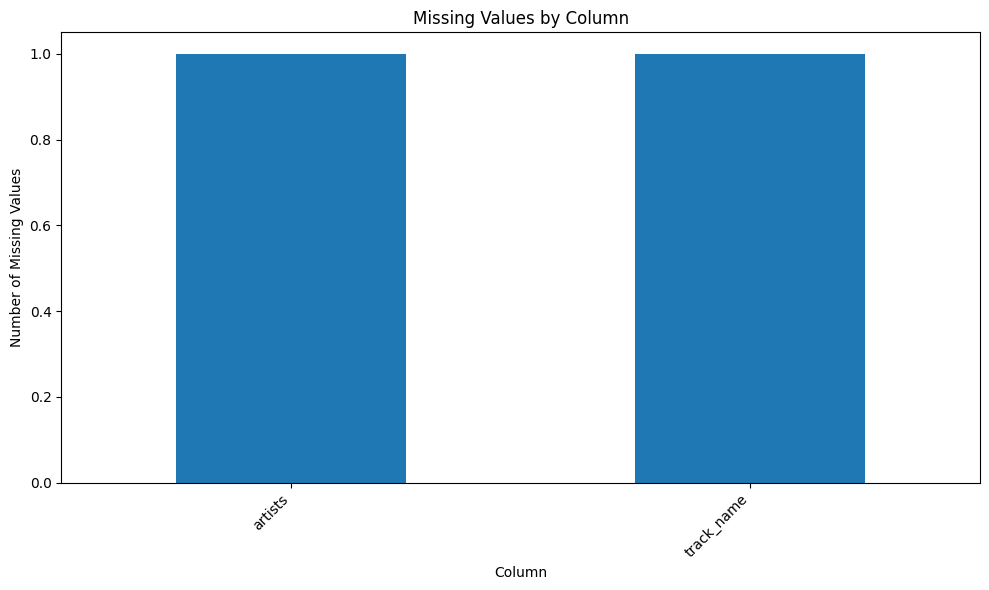

In [111]:
# Visualize missing values
import seaborn as sns

missing_counts = pop_df_cleaned.isnull().sum()
if missing_counts.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_counts[missing_counts > 0].sort_values(ascending=False).plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xlabel('Column')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to visualize.")

In [112]:
# Check data types and basic info
print("Dataset Information:")
print("="*60)
pop_df_cleaned.info()
print("\nBasic Statistics:")
print(pop_df_cleaned.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 12000 to 107999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           8999 non-null   object 
 1   track_name        8999 non-null   object 
 2   popularity        9000 non-null   int64  
 3   duration_ms       9000 non-null   int64  
 4   explicit          9000 non-null   int64  
 5   danceability      9000 non-null   float64
 6   energy            9000 non-null   float64
 7   key               9000 non-null   int64  
 8   loudness          9000 non-null   float64
 9   mode              9000 non-null   int64  
 10  speechiness       9000 non-null   float64
 11  acousticness      9000 non-null   float64
 12  instrumentalness  9000 non-null   float64
 13  liveness          9000 non-null   float64
 14  valence           9000 non-null   float64
 15  tempo             9000 non-null   float64
 16  time_signature    90

In [113]:
# Summary statistics for the 5 key features
key_features = ['energy', 'acousticness', 'valence', 'loudness', 'danceability']

print("Summary Statistics for Key Features:")
print("="*80)
print(pop_df_cleaned[key_features].describe())

print("\n" + "="*80)
print("\nCorrelation Matrix of Key Features:")
print(pop_df_cleaned[key_features].corr().round(3))

Summary Statistics for Key Features:
            energy  acousticness      valence     loudness  danceability
count  9000.000000   9000.000000  9000.000000  9000.000000   9000.000000
mean      0.622483      0.331799     0.504360    -7.588640      0.579987
std       0.210175      0.299175     0.224476     3.168932      0.138972
min       0.016700      0.000001     0.035900   -24.639000      0.101000
25%       0.465000      0.045300     0.325000    -9.415250      0.489000
50%       0.627000      0.256000     0.488000    -7.168500      0.586000
75%       0.795000      0.592000     0.684000    -5.339500      0.680000
max       0.999000      0.990000     0.985000     1.023000      0.953000


Correlation Matrix of Key Features:
              energy  acousticness  valence  loudness  danceability
energy         1.000        -0.710    0.471     0.717         0.052
acousticness  -0.710         1.000   -0.321    -0.487        -0.116
valence        0.471        -0.321    1.000     0.217         0.

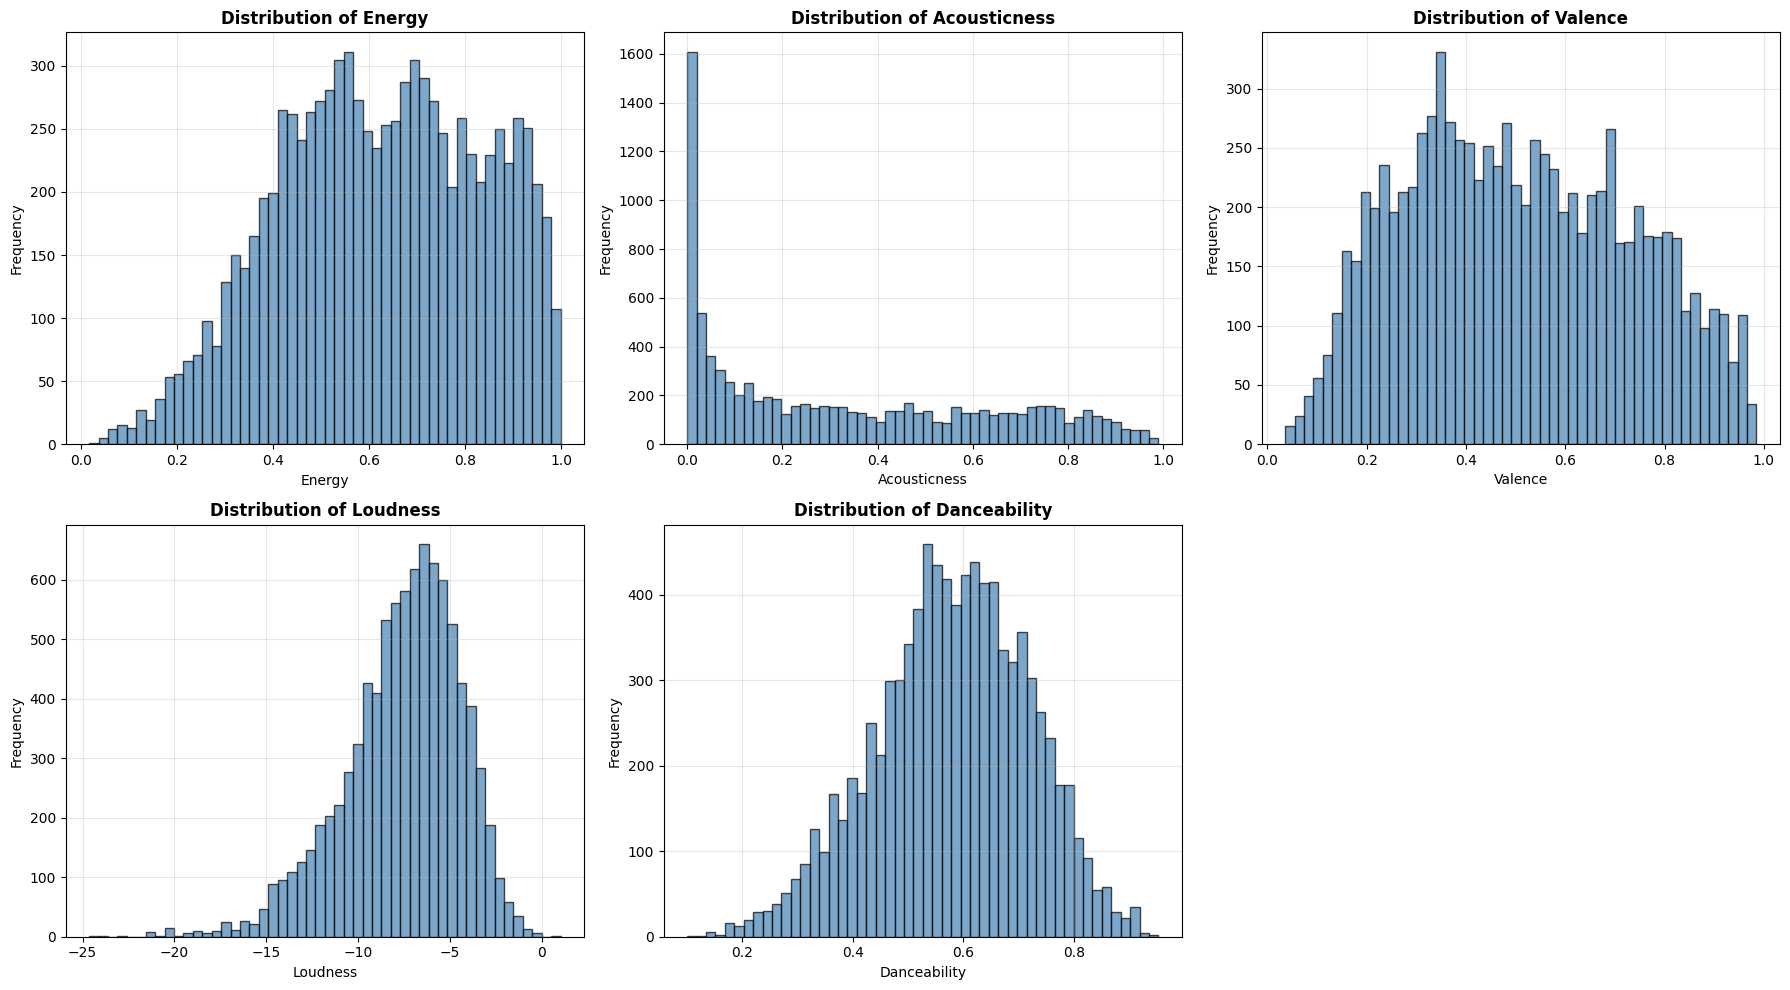

In [114]:
# Visualize distributions of all 5 key features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    axes[i].hist(pop_df_cleaned[feature], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_title(f'Distribution of {feature.capitalize()}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_92805/385486142.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=sorted(pop_genres))
/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_92805/385486142.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=sorted(pop_genres))
/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_92805/385486142.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(data_to_plot, labels=sorted(pop_genres))
/var/folders/ls/n8rw70v94sj4bsyx0myb87vr0000gn/T/ipykernel_92805/38548614

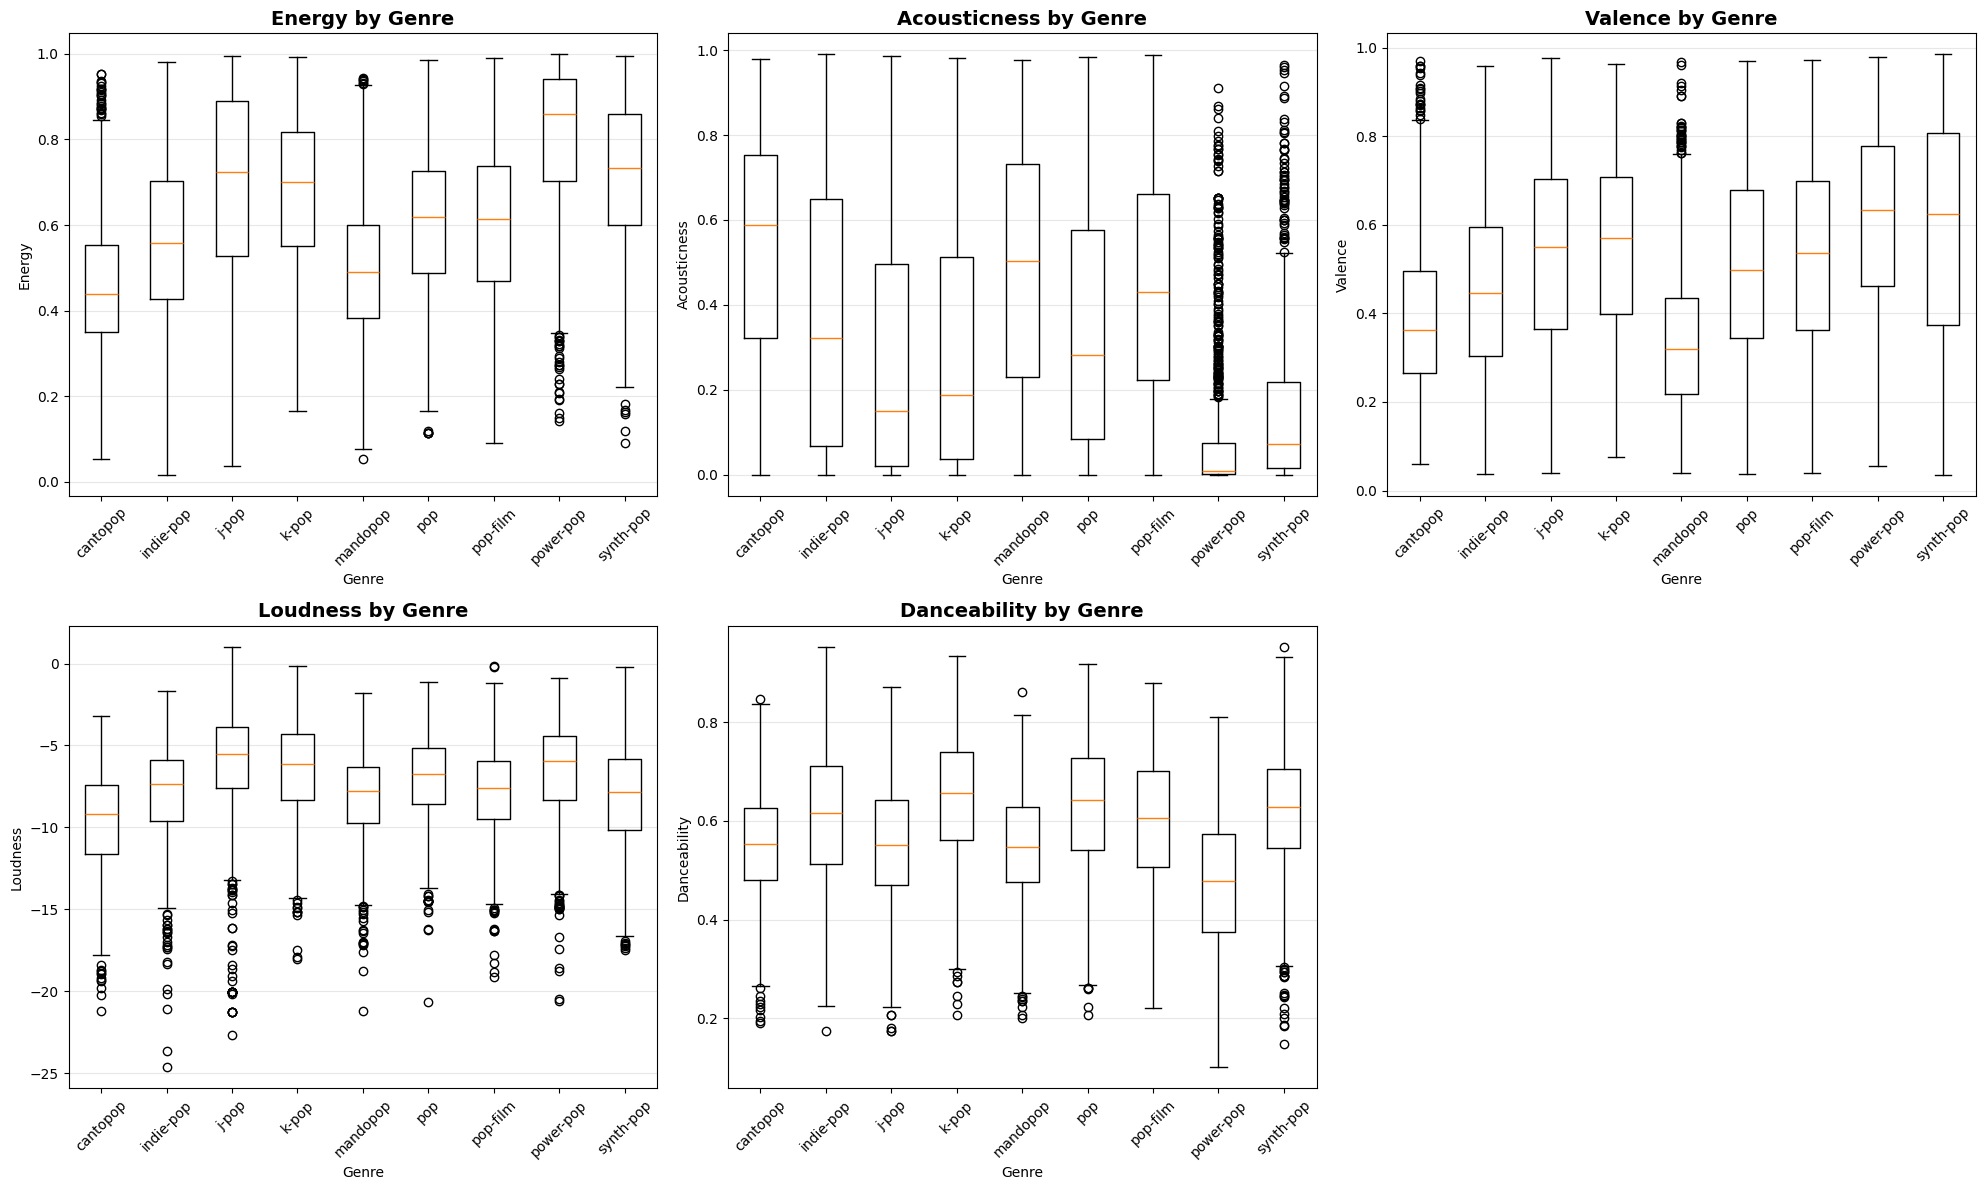

In [115]:
# Box plots comparing all 5 features across pop genres
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    data_to_plot = [pop_df_cleaned[pop_df_cleaned['track_genre'] == genre][feature].values 
                    for genre in sorted(pop_genres)]
    
    axes[i].boxplot(data_to_plot, labels=sorted(pop_genres))
    axes[i].set_title(f'{feature.capitalize()} by Genre', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel(feature.capitalize())
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(alpha=0.3, axis='y')

# Hide the extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

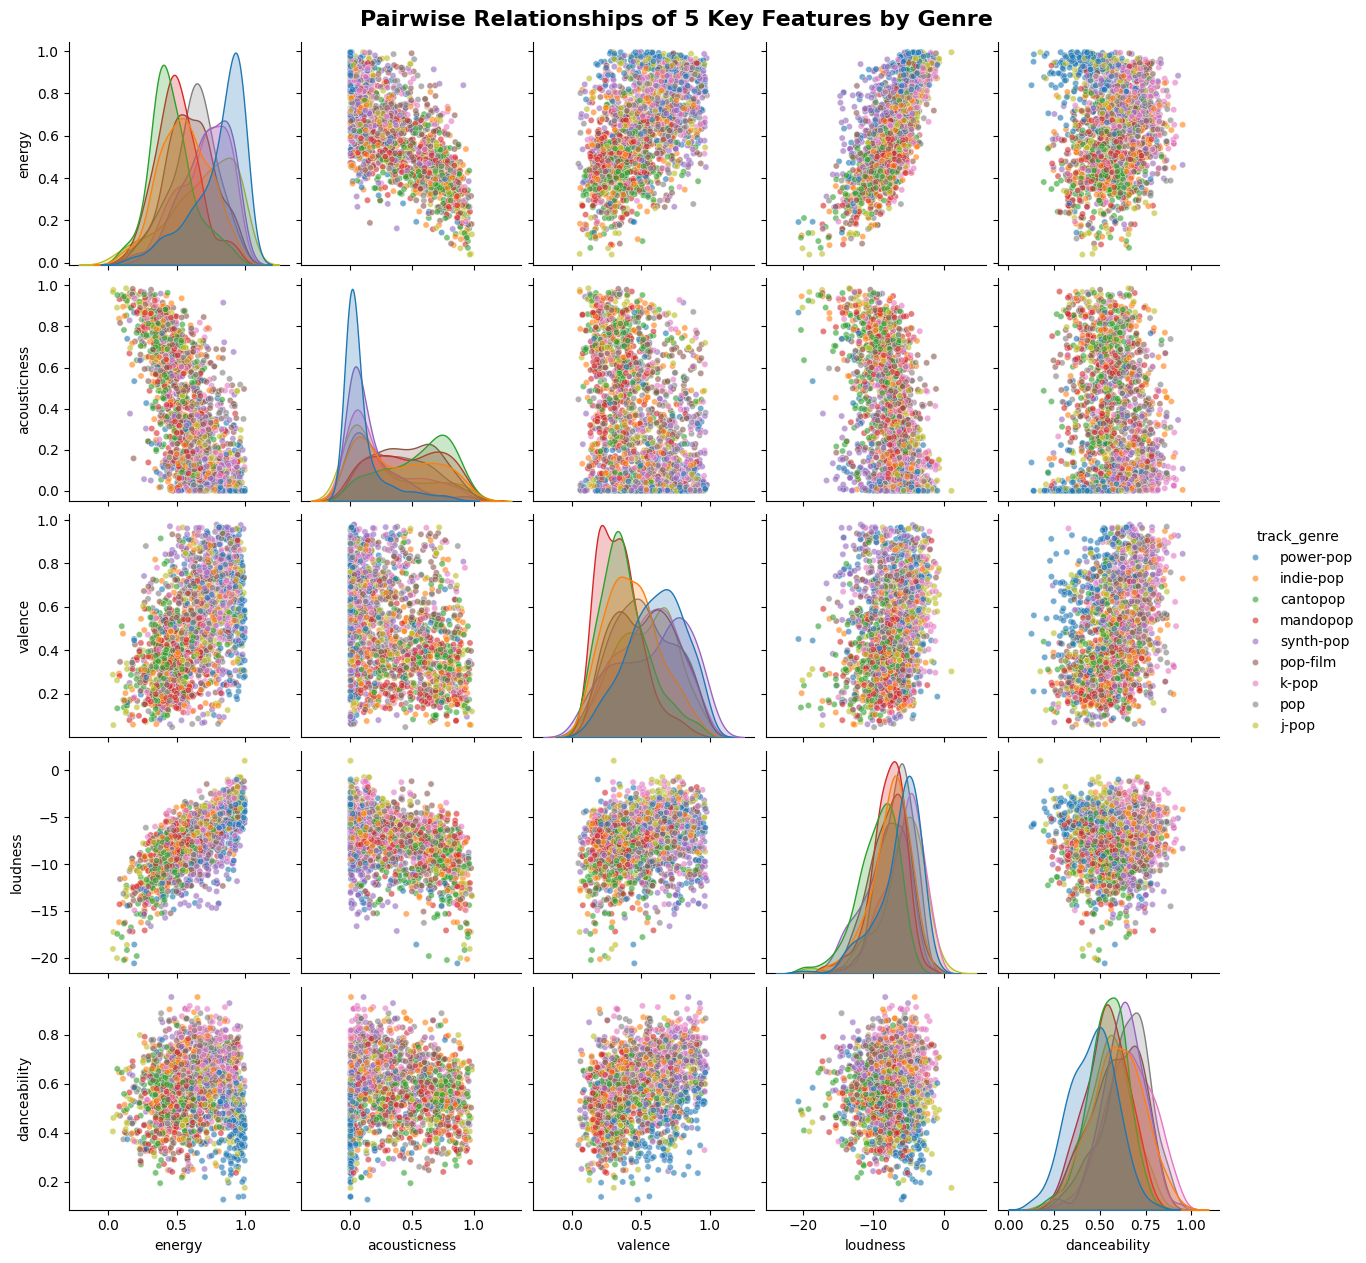

In [77]:
# Pairwise scatter plots to examine relationships between the 5 features
import seaborn as sns

# Create pairplot for the 5 key features
pairplot_data = pop_df_cleaned[key_features + ['track_genre']].copy()

# Sample data if too large for visualization
if len(pairplot_data) > 2000:
    pairplot_data = pairplot_data.sample(n=2000, random_state=42)

sns.pairplot(pairplot_data, hue='track_genre', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 20}, height=2.5)
plt.suptitle('Pairwise Relationships of 5 Key Features by Genre', y=1.01, fontsize=16, fontweight='bold')
plt.show()

Mean Values of Key Features by Genre:
             energy  acousticness  valence  loudness  danceability
track_genre                                                       
cantopop      0.462         0.536    0.394    -9.667         0.548
indie-pop     0.561         0.372    0.461    -7.997         0.604
j-pop         0.680         0.282    0.542    -6.280         0.552
k-pop         0.676         0.293    0.557    -6.471         0.648
mandopop      0.498         0.480    0.350    -8.177         0.547
pop           0.606         0.344    0.506    -6.954         0.630
pop-film      0.605         0.441    0.529    -7.872         0.597
power-pop     0.802         0.086    0.615    -6.676         0.473
synth-pop     0.713         0.152    0.586    -8.205         0.621


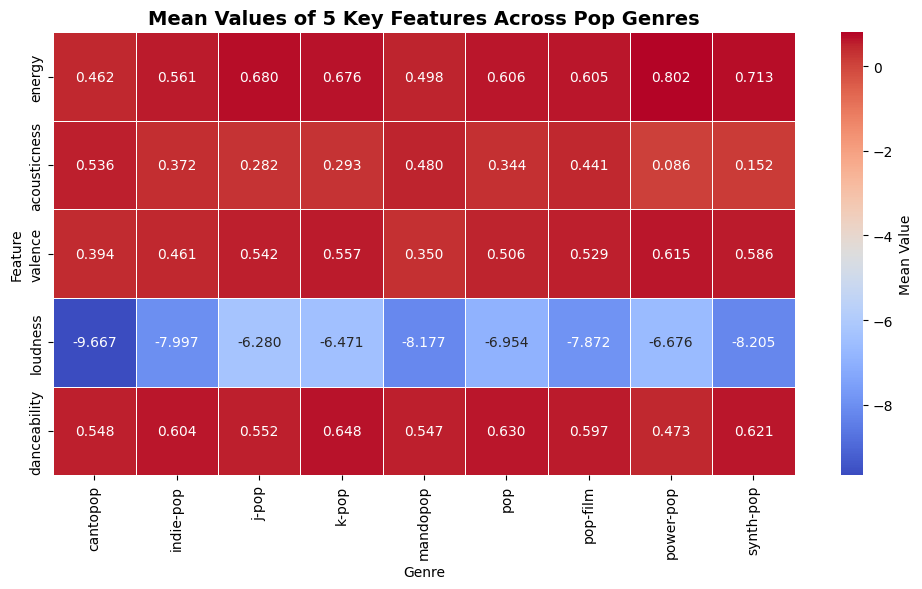

In [116]:
# Mean values of 5 key features by genre
feature_means = pop_df_cleaned.groupby('track_genre')[key_features].mean().round(3)

print("Mean Values of Key Features by Genre:")
print("="*90)
print(feature_means)

# Visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(feature_means.T, annot=True, fmt='.3f', cmap='coolwarm', 
            cbar_kws={'label': 'Mean Value'}, linewidths=0.5)
plt.title('Mean Values of 5 Key Features Across Pop Genres', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()